# Classification: Breast Cancer Diagnosis

## 1. Data Exploration

### 1.1 Load and prepare dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BC.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


For the development of our model, there will be 10 features and 1 target
- features: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean
- target: diagnosis

Removing columns that are unrelated.

In [2]:
df = df.drop(['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [3]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Target 'diagnosis' contains two objects data type, 'M' for malignant cell nuclei and 'B' for benign cell nuclei. We can use LabelEncoder to transform the data type from object to binary
- Malignant = 1
- Benign = 0

In [4]:
from sklearn.preprocessing import LabelEncoder

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Our data is fully prepared for EDA purposes.

### 1.2 Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int32  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int32(1)
memory usage: 46.8 KB


Our dataset contains 569 samples of cell nuclei and there is no null value.

In [6]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


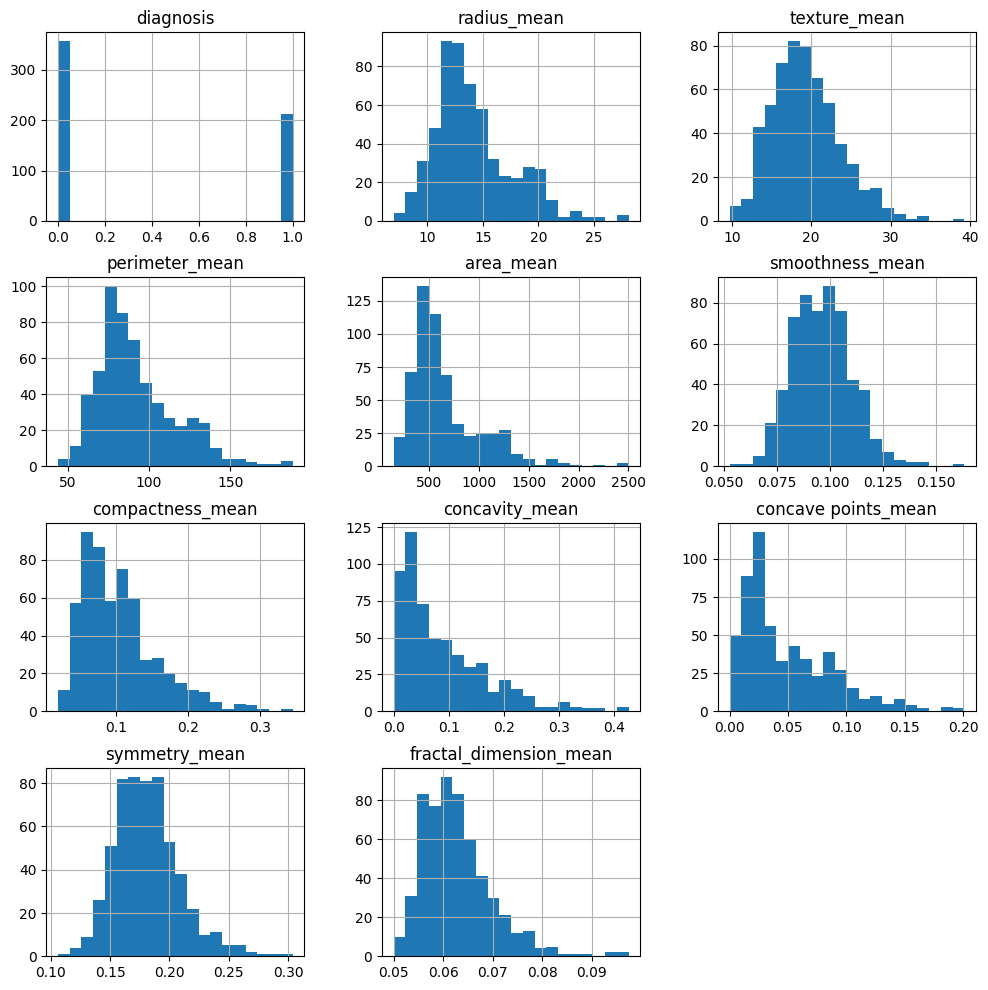

In [7]:
# Plot histograms for each feature
df.hist(figsize = (12, 12), bins = 20)
plt.show()

Observations:
- area_mean, concavity_mean, concave points_mean distribution looks skewed to the right
- uneven scaling
- from diagnosis, it looks like we have a bit of data imbalance


In [8]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

We have more benign samples than malignant. Thus, we can consider using oversampling technique.

In [9]:
df.skew().sort_values(ascending=False)

area_mean                 1.645732
concavity_mean            1.401180
fractal_dimension_mean    1.304489
compactness_mean          1.190123
concave points_mean       1.171180
perimeter_mean            0.990650
radius_mean               0.942380
symmetry_mean             0.725609
texture_mean              0.650450
diagnosis                 0.528461
smoothness_mean           0.456324
dtype: float64

We can see that area_mean, concavity_mean, fractal_dimension_mean, compactness_mean, and concave points_mean have high skewness compared to the rest.

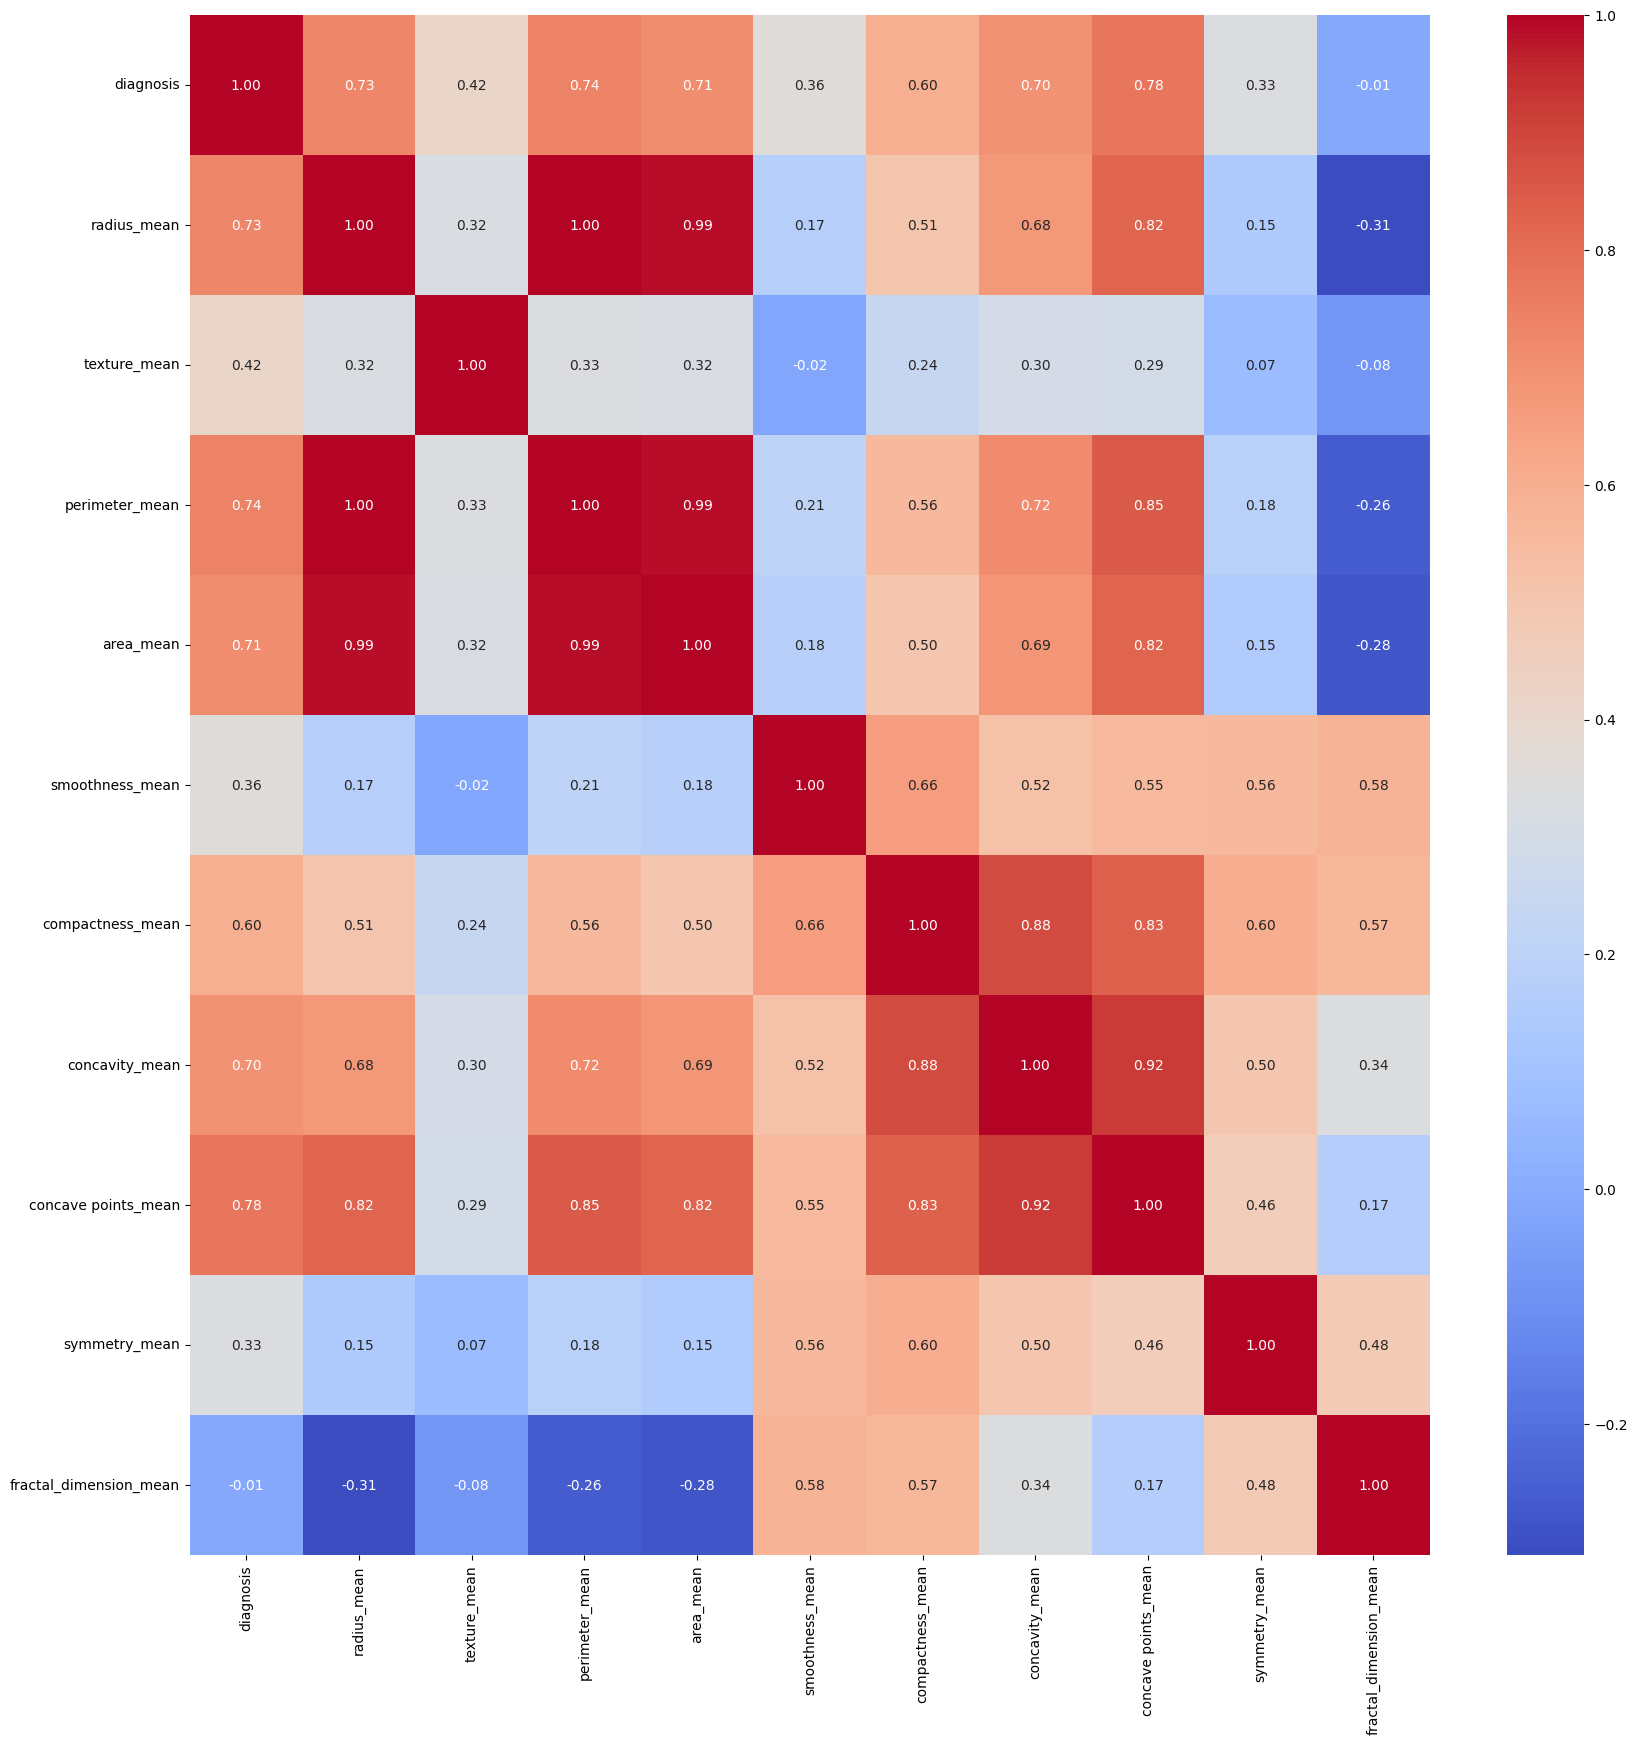

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [11]:
corr = df.corr()
corr['diagnosis'].sort_values(ascending=False)

diagnosis                 1.000000
concave points_mean       0.776614
perimeter_mean            0.742636
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
compactness_mean          0.596534
texture_mean              0.415185
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64

## 2. Data Preprocessing

### 2.1 Split features and target

In [12]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(X.shape)
print(y.shape)

(569, 10)
(569,)


### 2.2 Split training, validation and testing dataset

We will use 60:20:20 ratio for the size of training, validation and testing dataset.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(341, 10)
(114, 10)
(114, 10)
(341,)
(114,)
(114,)


### 2.3 Build pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

def log_pipeline():
    return make_pipeline(
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler()
    )

def std_pipeline():
    return StandardScaler()

preprocessing = ColumnTransformer([
    ("log", log_pipeline(), ['area_mean', 'concavity_mean', 'fractal_dimension_mean', 'compactness_mean', 'concave points_mean']),
], remainder=std_pipeline())

# check for shape
preprocessing.fit_transform(X_train).shape

(341, 10)

## 3. Model Training and Selection

### 3.1 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(preprocessing, LogisticRegression())
lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['area_mean',
                                                   'concavity_mean',
                                                   'fractal_dimension_mean',
                                                   'compactness_mean',
                                                   'concave points_mean'])])),
                ('logisticregression', LogisticRegression())])

### 3.2 Support Vector Machine

In [16]:
from sklearn.svm import SVC

svm = make_pipeline(preprocessing, SVC())
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['area_mean',
                                                   'concavity_mean',
                                                   'fractal_dimension_mean',
                                                   'compactness_mean',
                                                   'concave points_mean'])])),
                ('svc', SVC())])

### 3.3 Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(preprocessing, DecisionTreeClassifier())
dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['area_mean',
                                                   'concavity_mean',
                                                   'fractal_dimension_mean',
                                                   'compactness_mean',
                                                   'concave points_mean'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### 3.4 Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(preprocessing, RandomForestClassifier())
rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['area_mean',
                                                   'concavity_mean',
                                                   'fractal_dimension_mean',
                                                   'compactness_mean',
                                                   'concave points_mean'])])),
                ('randomforestclassifier', RandomForestClassifier())])